### Introduction

For the final project, you will conduct your own data analysis and create a file to share that documents your findings. You should start by taking a look at your dataset and brainstorming what questions you could answer using it. Then you should use Pandas and NumPy to answer the questions you are most interested in, and create a report sharing the answers. You will not be required to use statistics or machine learning to complete this project, but you should make it clear in your communications that your findings are tentative. This project is open-ended in that we are not looking for one right answer.

### Step One - Choose Your Data Set

Choose one of the following datasets to analyze for your project:

* Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on [the Kaggle website](https://www.kaggle.com/c/titanic/data), where the data was obtained.
* Baseball Data - A data set containing complete batting and pitching statistics from 1871 to 2014, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. This dataset contains many files, but you can choose to analyze only the one(s) you are most interested in.

Choose the comma-delimited version, which contains CSV files.

### Step Two - Get Organized

Eventually you’ll want to share your project with friends, family, and employers. Get organized before you begin. We recommend creating a single folder that will eventually contain:

* The report communicating your findings
* Any Python code you wrote as part of your analysis
* The data set you used (which you will not need to submit)

You may wish to use IPython notebook, in which case you can share both the code you wrote and the report of your findings in the same document. Otherwise, you will need to store your report and code separately.

### Step Three - Analyze Your Data

Brainstorm some questions you could answer using the data set you chose, then start answering those questions. Here are some ideas to get you started:

* Titanic Data
 * What factors made people more likely to survive?
* Baseball Data
 * What is the relationship between different performance metrics? Do any have a strong negative or positive relationship?
 * What are the characteristics of baseball players with the highest salaries?

Make sure you use NumPy and Pandas where they are appropriate!

### Step Four - Share Your Findings

Once you have finished analyzing the data, create a report that shares the findings you found most interesting. You might wish to use IPython notebook to share your findings alongside the code you used to perform the analysis, but you can also use another tool if you wish.

### Step Five - Review

Use the Project Rubric to review your project. If you are happy with your project, then you're finished! If you see room for improvement, keep working to improve your project.

### 参考教程

[机器学习系列(3)_逻辑回归应用之Kaggle泰坦尼克之灾](https://blog.csdn.net/han_xiaoyang/article/details/49797143)

In [14]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

data_train = pd.read_csv("./Data/train.csv")
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


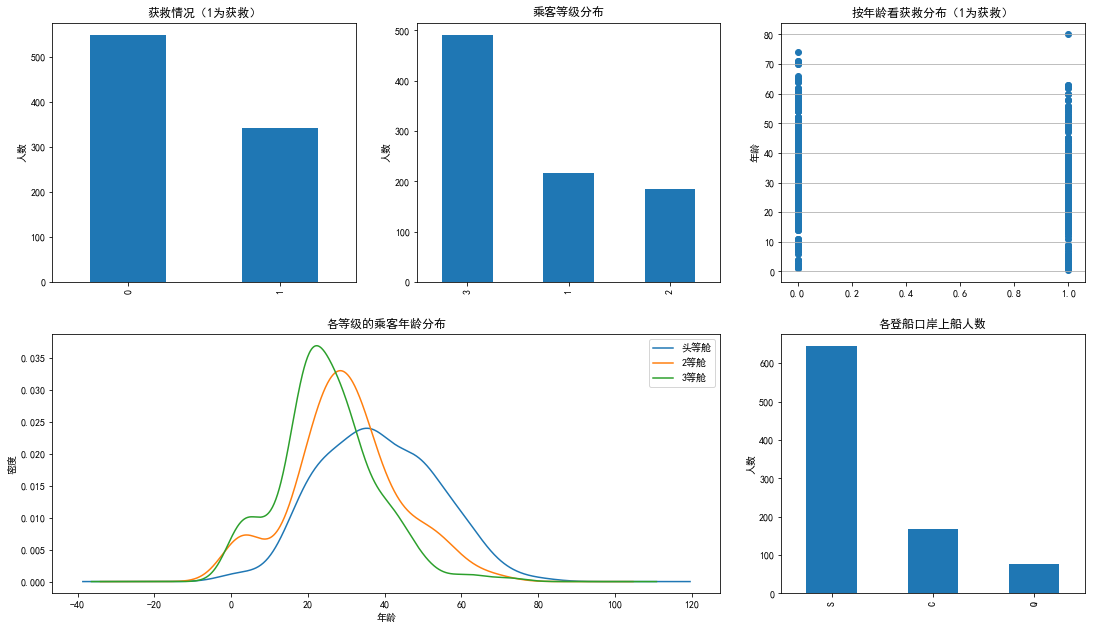

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2) # 设定图标颜色alpha参数
fig.set_size_inches(18.5, 10.5)
plt.subplot2grid((2, 3), (0, 0)) # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar') # 柱状图
plt.title(u"获救情况（1为获救）") # 标题
plt.ylabel(u"人数")

plt.subplot2grid((2,3), (0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3), (0, 2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄")
plt.grid(b=True, which='major', axis='y')
plt.title(u"按年龄看获救分布（1为获救）")

plt.subplot2grid((2,3), (1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")
plt.ylabel(u"密度")
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱', u'3等舱'), loc='best')

plt.subplot2grid((2,3), (1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")

plt.show()

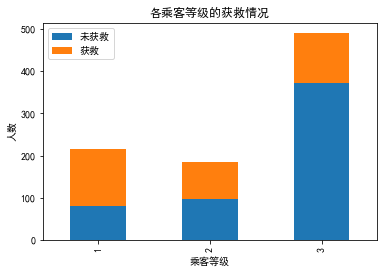

In [10]:
# 各乘客等级的获救情况

fig = plt.figure()
fig.set(alpha = 0.2)
fig.set_size_inches(18.5, 10.5)
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救': Survived_1, u'未获救': Survived_0})
df.plot(kind = 'bar', stacked = True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级")
plt.ylabel(u"人数")
plt.show()

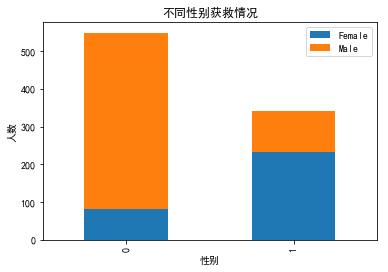

In [20]:
# 不同性别获救情况

fig = plt.figure()
fig.set(alpha=0.2)

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({u'Male':Survived_m, u'Female': Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"不同性别获救情况")
plt.xlabel(u"性别")
plt.ylabel(u"人数")
plt.show()

In [16]:
from sklearn.ensemble import RandomForestRegressor

### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

    return df, rfr

data_train, rfr = set_missing_ages(data_train)
data_train.head()

ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required.

In [17]:
from sklearn import preprocessing

df = data_train

age_scaled = preprocessing.scale(df['Age'])
fare_scaled = preprocessing.scale(df['Fare'])
# age_scale_param = scaler.fit(df['Age'])
# df['Age_scaled'] = scaler.fit_transform(df['Age'], age_scale_param)
X = pd.DataFrame({u'Age': age_scaled, u'Fare': fare_scaled})

from sklearn import linear_model

y = data_train.Survived

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
data_test = pd.read_csv("./Data/test.csv")
data_test.describe()

data_test, rfr = set_missing_ages(data_test)
age_scaled = preprocessing.scale(data_test['Age'])
fare_scaled = preprocessing.scale(data_test['Fare'])

X_test = pd.DataFrame({u'Age': age_scaled, u'Fare': fare_scaled})
y_test = data_test.Survived
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200
